## Deliverables:

Import your data into a Pandas DataFrame.

Merge your DataFrames.

Create a bubble chart that showcases the average fare versus the total number 
of rides with bubble size based on the total number of drivers for each city type, including urban, suburban, and rural.

### Determine the mean, median, and mode for the following:

The total number of rides for each city type.

The average fares for each city type.

The total number of drivers for each city type.

### Create box-and-whisker plots that visualize each of the following to determine if there are any outliers:

The number of rides for each city type.

The fares for each city type.

The number of drivers for each city type.

### Create a pie chart that visualizes each of the following data for each city type:

The percent of total fares.

The percent of total rides.

The percent of total drivers.

In [2]:
# Add the Matplotlib inline magic command

%matplotlib inline

# Dependecies and setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# Files to load

city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"


In [4]:
# Read the city data file and store it in a pandas DataFrame

city_data_df = pd.read_csv(city_data_to_load)

city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [5]:
# Read the ride data file and store it in a pandas DataFrame

ride_data_df = pd.read_csv(ride_data_to_load)

ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [6]:
# Get the columns and the rows that are not null (city data)

print(f'{city_data_df.count()}\n')

# Get the columns and the rows that are not null 

print(f'{city_data_df.isnull().sum()}\n')

# Get the data types of each column

print(f'{city_data_df.dtypes}\n')

# Get the unique values of the type of city

print(f'{city_data_df["type"].unique()}\n')

# Get the number of data points from the urban cities

urban_count = sum(city_data_df["type"]=='Urban')

suburban_count = sum(city_data_df["type"]=='Suburban')

rural_count = sum(city_data_df["type"]=='Rural')

print(f' Urban: {urban_count}, Suburban: {suburban_count}, Rural: {rural_count}')

city            120
driver_count    120
type            120
dtype: int64

city            0
driver_count    0
type            0
dtype: int64

city            object
driver_count     int64
type            object
dtype: object

['Urban' 'Suburban' 'Rural']

 Urban: 66, Suburban: 36, Rural: 18


In [7]:
# Get the columns and the rows that are not null (ride data)

print(f'{ride_data_df.count()}\n')

# Get the columns and the rows that are not null 

print(f'{ride_data_df.isnull().sum()}\n')

# Get the data types of each column

print(f'{ride_data_df.dtypes}\n')


city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

city       0
date       0
fare       0
ride_id    0
dtype: int64

city        object
date        object
fare       float64
ride_id      int64
dtype: object



### Merge DataFrames

In [8]:
# combine the data into a single dataset

pyber_data_df = pd.merge(ride_data_df, city_data_df, how = "left", on = ['city', 'city'])

# Display the DataFrame

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


### Create a bubble chart for the data:

Need to create 3 series for each city type dataframe:

1. count of rides
2. avg fare
3. avg drivers

In [9]:
# Create the urban, suburban, and rural city DataFrames

urban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Urban']

suburban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Suburban']

rural_cities_df = pyber_data_df[pyber_data_df['type'] == 'Rural']


In [10]:
# Get the number of rides for urban cities

urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']

urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [11]:
# Get the suburban and rural ride counts

suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']

rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']

In [12]:
# Get the average Fare ($) for urban cities

urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']

urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [13]:
# Get the avg fare for suburban and rural cities

suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']

rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']

In [14]:
# Get the avg driver count for urban cities

urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']

urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [15]:
# get the avg driver count for suburban and rural cities

suburban_driver_count = suburban_cities_df.groupby(['city']).mean()['driver_count']

rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']


### Create 3 bubble charts; one for each city type:

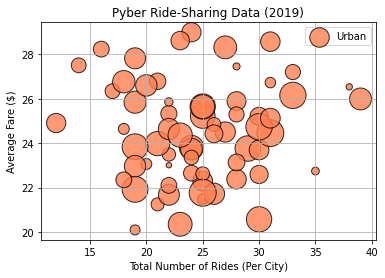

In [16]:
# Build the scatter plots for urban cities.

plt.scatter(urban_ride_count, 
            urban_avg_fare,
            s=(10*urban_driver_count), c='coral',
            edgecolor='black', linewidths = 1,
            alpha=0.8, label="Urban")
plt.legend()
plt.title('Pyber Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(True)


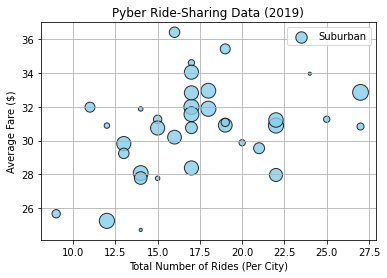

In [17]:
# Build the scatter plots for suburban cities

plt.scatter(suburban_ride_count,
           suburban_avg_fare,
           s=(10*suburban_driver_count), c='skyblue',
           edgecolor = 'black', linewidths=1,
           alpha=0.8, label='Suburban')
plt.legend()
plt.title('Pyber Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(True)


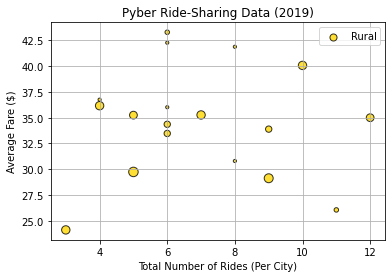

In [18]:
# Build the scatter plots for rural cities

plt.scatter(rural_ride_count,
           rural_avg_fare,
           s=10*rural_driver_count, c='gold',
           edgecolor='black', linewidths=1,
           alpha=0.8, label="Rural")

plt.legend()
plt.title('Pyber Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(True)

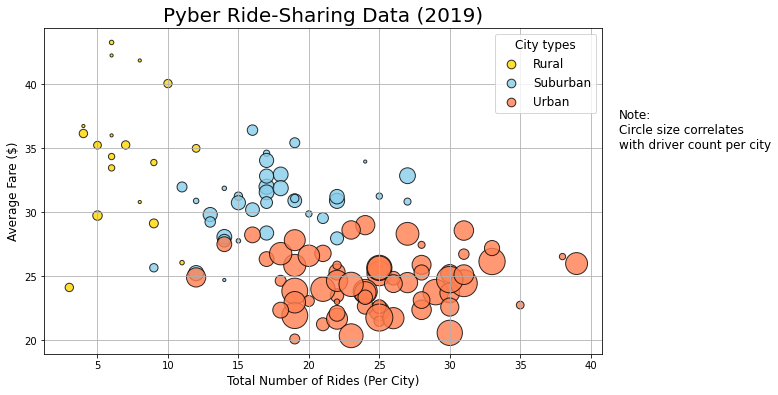

In [22]:
# Add the scatter charts for each type of city.

plt.subplots(figsize=(10,6))

plt.scatter(rural_ride_count,
           rural_avg_fare,
           s=10*rural_driver_count, c='gold',
           edgecolor='black', linewidths=1,
           alpha=0.8, label="Rural")

plt.scatter(suburban_ride_count,
           suburban_avg_fare,
           s=(10*suburban_driver_count), c='skyblue',
           edgecolor = 'black', linewidths=1,
           alpha=0.8, label='Suburban')

plt.scatter(urban_ride_count, 
            urban_avg_fare,
            s=(10*urban_driver_count), c='coral',
            edgecolor='black', linewidths = 1,
            alpha=0.8, label="Urban")

# Incorporate the other graph properties

plt.title('Pyber Ride-Sharing Data (2019)', fontsize=20)
plt.xlabel('Total Number of Rides (Per City)', fontsize = 12)
plt.ylabel('Average Fare ($)', fontsize=12)
plt.grid(True)

# Add the legend - and format it to what we need

lgnd = plt.legend(fontsize='12', mode='Expanded',
                 scatterpoints=1, loc='best', title='City types')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.

plt.text(42, 35, 'Note:\nCircle size correlates\nwith driver count per city', fontsize= 12)

# Save the Figure

plt.savefig("analysis/Fig1.png", bbox_inches='tight')

# show the plot

plt.show()
